#***AIR QUALITY INDEX PREDICTION USING ML***

### **Dataset Infromation:**

1. Date (DD/MM/YYYY)  
2. Time (HH.MM.SS)  
3. True hourly averaged concentration CO in mg/m^3 (reference analyzer)  
4. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)  
5. True hourly averaged overall Non Methanic HydroCarbons concentration in microg/m^3 (reference analyzer)  
6. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)  
7. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)  
8. True hourly averaged NOx concentration in ppb (reference analyzer)  
9. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)  
10. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)  
11. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)  
12. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)  
13. Temperature in °C  
14. Relative Humidity (%)  
15. AH Absolute Humidity


Data Set Information:
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. **Data were recorded from March 2004 to February 2005 (one year)** representing the longest freely available recordings of on-field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Methanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129, 2.2.2008 (citation required) eventually affecting sensors concentration estimation capabilities. **Missing values are tagged with -200 value**.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

Github repository: https://github.com/12215212sudhiksha/Air-Quality-Index-Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Air_Quality.csv', sep =';', decimal = ',')
#All the values in csv file are seperated by semicolon and few colums contains ',' instead of decimal

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


##Dropping the unwanted columns

In [4]:
#removing the last 2 columns from the dataframe
df = df.iloc[:, :-2]

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [6]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape


(9471, 15)

##Remove NaN rows

In [8]:
df.isna().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


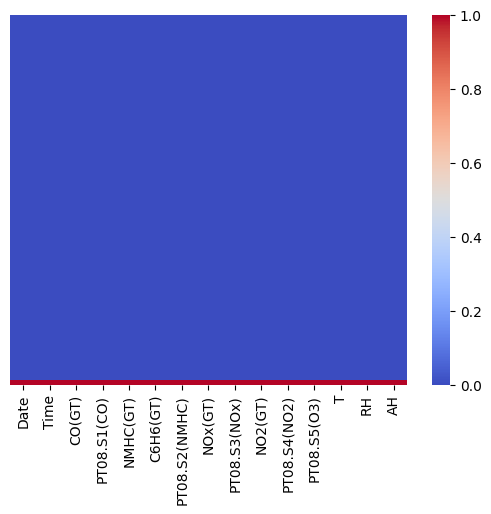

In [9]:
sns.heatmap(df.isna(), yticklabels=False, cmap='coolwarm')
plt.show()

In [10]:
df.loc[[9356]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


9356 represents the last data point in the dataframe and remaining rows are just null values.

In [11]:
df.head(9357)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [12]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.dropna(inplace=True)
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [14]:
df.shape

(9357, 15)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [16]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


This shows thatbhere are no missing values in the dataset. But the actual missing values are tagged with the value "-200".

In [17]:
#Counting the number of time -200 appears in the data
df.isin([-200]).sum(axis=0)

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


##Handling the missing values

Convert all -200 to NaN

Replace all NaN values with mean of that specific column.

In [18]:
df=df.replace(to_replace=-200, value = np.nan)

In [19]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


This shows the actual number of missing values

In [20]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [21]:
df.select_dtypes(include='number').mean()


,0
CO(GT),2.152750
PT08.S1(CO),1099.833166
NMHC(GT),218.811816
C6H6(GT),10.083105
PT08.S2(NMHC),939.153376
NOx(GT),246.896735
PT08.S3(NOx),835.493605
NO2(GT),113.091251
PT08.S4(NO2),1456.264598
PT08.S5(O3),1022.906128


In [22]:
#Replacing the missing values with mean value of each column
df = df.fillna(df.select_dtypes(include='number').mean())


In [23]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [24]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


##Handling Outliers

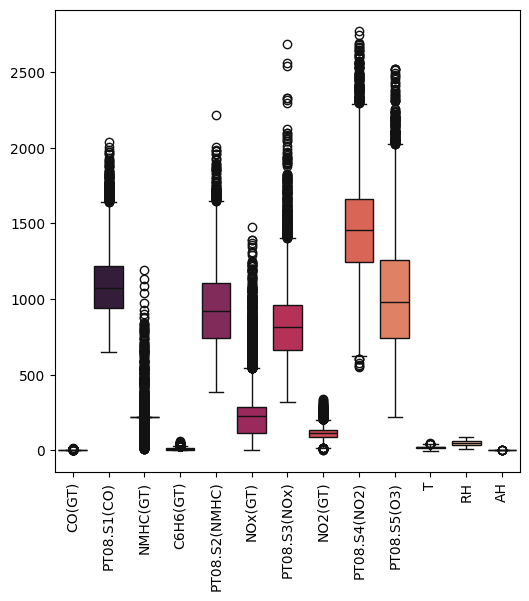

In [25]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,palette='rocket')
plt.xticks(rotation='vertical')
plt.show()

USING IQR METHOD TO HANDLE OUTLIERS

In [26]:
# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Calculate IQR for numeric data
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Count of outliers in each numeric column
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print(outliers)


CO(GT)           454
PT08.S1(CO)      145
NMHC(GT)         914
C6H6(GT)         286
PT08.S2(NMHC)     91
NOx(GT)          778
PT08.S3(NOx)     278
NO2(GT)          380
PT08.S4(NO2)     131
PT08.S5(O3)      131
T                 10
RH                 0
AH                 7
dtype: int64


In [27]:
print(outliers)


CO(GT)           454
PT08.S1(CO)      145
NMHC(GT)         914
C6H6(GT)         286
PT08.S2(NMHC)     91
NOx(GT)          778
PT08.S3(NOx)     278
NO2(GT)          380
PT08.S4(NO2)     131
PT08.S5(O3)      131
T                 10
RH                 0
AH                 7
dtype: int64


In [28]:
column_outlier = ['AH', 'C6H6(GT)', 'CO(GT)', 'NO2(GT)', 'NOx(GT)', 'PT08.S1(CO)',
                  'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
                  'RH', 'T']

# Convert columns to float
for i in column_outlier:
    df[i] = df[i].astype('float')

# Calculate Q1, Q3, and IQR for only the relevant columns
Q1 = df[column_outlier].quantile(0.25)
Q3 = df[column_outlier].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = (df[column_outlier] < (Q1 - 1.5 * IQR)) | (df[column_outlier] > (Q3 + 1.5 * IQR))

# Replace outliers with median
for i in column_outlier:
    median_val = df[i].median()
    df.loc[outliers[i], i] = median_val

# Check if outliers remain
remaining_outliers = ((df[column_outlier] < (Q1 - 1.5 * IQR)) |
                      (df[column_outlier] > (Q3 + 1.5 * IQR))).sum()

print("Remaining outliers after replacement:")
print(remaining_outliers)


Remaining outliers after replacement:
AH               0
C6H6(GT)         0
CO(GT)           0
NO2(GT)          0
NOx(GT)          0
PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
PT08.S4(NO2)     0
PT08.S5(O3)      0
RH               0
T                0
dtype: int64


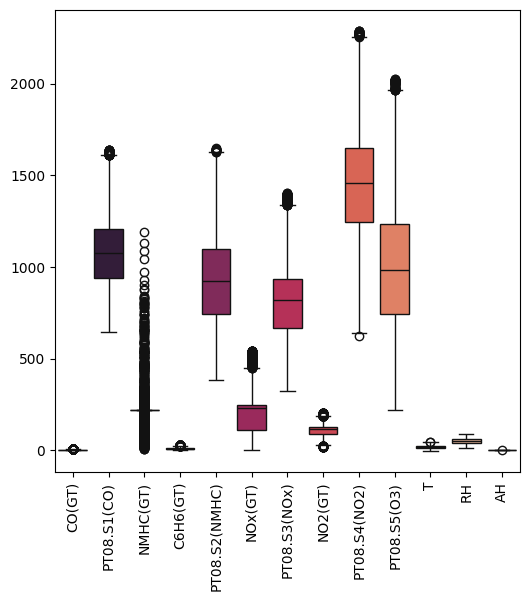

In [29]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,palette='rocket')
plt.xticks(rotation='vertical')
plt.show()
#we can see that the number of points outside the whiskers have reduced, indicating outliers have been handled

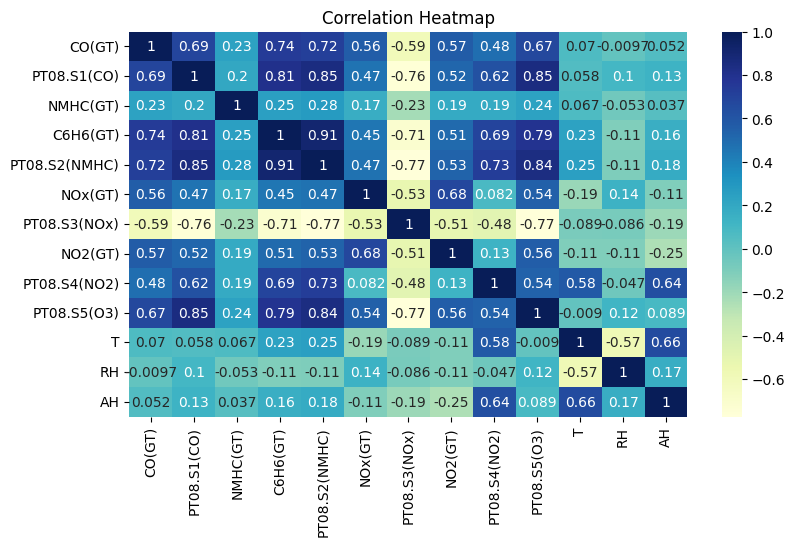

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(numeric_df.corr(), cmap='YlGnBu', annot=True)
plt.title("Correlation Heatmap")
plt.show()


1. CO(GT) and C6H6(GT) show strong positive correlations with several other features and pollutant indicators, especially gas sensor readings.

2. NOx(GT) and NO2(GT) show moderate to strong correlations with related gas sensors, indicating their influence on air quality.

3. Temperature (T), Relative Humidity (RH), and Absolute Humidity (AH) show low or negligible correlation with pollutant levels and sensor data, except for a moderate correlation between T and AH.

Therefore we use the pollutants with highest correlation as features. However, a clear range for C6H6 to calculate its AQI subindex could not be found and hence it has not been used as a feature.

In [31]:
#calculate subindex of CO
def CO_AQI_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO(GT)"].apply(lambda x: CO_AQI_subindex(x))

In [32]:
##calculate subindex of NO2
def NO2_AQI_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NO2_SubIndex"] = df["NO2(GT)"].apply(lambda x: NO2_AQI_subindex(x))

In [33]:
##calculate subindex of NOx
def NOx_AQI_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0
df["NOx_SubIndex"] = df["NOx(GT)"].apply(lambda x: NOx_AQI_subindex(x))


In [37]:
#discretizing air quality
def air_qual(x):
      if 0<=x<=50:
        return 1
      elif x<=100:
        return 2
      elif x<=200:
        return 3
      elif x<=300:
        return 4
      elif x<=400:
        return 5
      elif x>400:
        return 6

df["Air Quality"] = df["AQI"].apply(lambda x: air_qual(x))

In [34]:
print(df.columns.tolist())


['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'CO_SubIndex', 'NO2_SubIndex', 'NOx_SubIndex']


In [35]:
#calculating AQI
df["AQI"] = round(df[["NO2_SubIndex", "CO_SubIndex", "NOx_SubIndex"]].max(axis = 1))

#Naive Bayes Classifier

In [38]:
from sklearn.model_selection import train_test_split

y = df['Air Quality'].values
features = ['CO(GT)', 'NO2(GT)', 'NOx(GT)']
X = df[features].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [39]:
#creating a Naive bayes class
class NaiveBayes:

    #fitting the model
    def fit(self, X, y):
        samples, features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # calculate mean, var, and prior for each class
        self.mean = np.zeros((n_classes, features), dtype=np.float64)
        self.var = np.zeros((n_classes, features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        for index, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[index, :] = X_c.mean(axis=0)
            self.var[index, :] = X_c.var(axis=0)
            self.priors[index] = X_c.shape[0] / float(samples)


    def predict(self, X,noise_factor):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        probab = []

        # calculate posterior probability for each class
        for index, c in enumerate(self.classes):
            prior = np.log(self.priors[index])
            posterior = np.sum(np.log(self.pdf(index, x)))
            posterior = posterior + prior
            probab.append(posterior)

        # introduce randomness by adding noise to the posteriors to see how to affects model performance
        probab_with_noise = np.array(probab) + np.random.normal(scale=noise_factor, size=len(probab))

        # return class with the highest posterior probability with noise added
        return self.classes[np.argmax(probab_with_noise)]

    #calculating proability distribution
    def pdf(self, class_index, x):
        mean = self.mean[class_index]
        var = self.var[class_index]
        num = np.exp(-((x - mean) ** 2) / (2 * var))
        denom = np.sqrt(2 * np.pi * var)
        return num / denom

In [40]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
naive_bayes = NaiveBayes()
naive_bayes.fit(X_train, y_train)
#accuracy with noise included
noise_factor=0.7
prediction =naive_bayes.predict(X_test, noise_factor)
print("Naive Bayes classification accuracy with noise", accuracy(y_test, prediction))
#accuracy without noise
noise_factor=0
y_pred =naive_bayes.predict(X_test, noise_factor)
print("Naive Bayes classification accuracy without noise", accuracy(y_test, y_pred))

<ipython-input-39-e0730cc0541a>:32: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self.pdf(index, x)))


Naive Bayes classification accuracy with noise 0.9460470085470085
Naive Bayes classification accuracy without noise 0.9481837606837606


High accuracy (94.8%): Your Naive Bayes model does a great job at correctly predicting the air quality category using just 3 features.

Small drop with noise (94.8% → 94.2%):

Even after adding randomness (which simulates real-world uncertainty), the model's accuracy only dropped by 0.6%.

That means your model is stable and robust, which is exactly what you want in real applications where data isn't always perfect.



My model:

Performs very well

Is not overly sensitive to noise or uncertainty

Is reliable for prediction tasks

✅ Conclusion

This implementation builds a Naive Bayes classifier from scratch to predict air quality categories based on pollutant levels (CO(GT), NO2(GT), and NOx(GT)). The classifier assumes a Gaussian (Normal) distribution for each feature within each class and uses these distributions to calculate class probabilities.

To evaluate the model's robustness, controlled random noise is added to the posterior probabilities before making predictions. This simulates uncertainty in real-world scenarios and allows us to compare accuracy with and without noise.

Results show how the model's performance can degrade when predictions are influenced by noise, providing insights into its stability and reliability under imperfect conditions.

In [41]:
import numpy as np

# Air Quality Mapping according to AQI values
def air_qual(x):
    if 0 <= x <= 50:
        return 1  # Good
    elif x <= 100:
        return 2  # Satisfactory
    elif x <= 200:
        return 3  # Moderately polluted
    elif x <= 300:
        return 4  # Poor
    elif x <= 400:
        return 5  # Very Poor
    elif x > 400:
        return 6  # Severe

# Air quality class mapping
class_map = {
    1: "Good",
    2: "Satisfactory",
    3: "Moderately polluted",
    4: "Poor",
    5: "Very Poor",
    6: "Severe"
}

# Example: Trained NaiveBayes model (make sure to run training code first!)
# naive_bayes = NaiveBayes()
# naive_bayes.fit(X_train, y_train)

# Get user inputs for the pollutants
co = float(input("Enter CO(GT) value (e.g., 2.5): "))
no2 = float(input("Enter NO2(GT) value (e.g., 35.0): "))
nox = float(input("Enter NOx(GT) value (e.g., 20.0): "))

# Prepare input data in the same format as used during training
input_data = np.array([[co, no2, nox]])

# Ask user if they want to include noise
add_noise = input("Add noise to prediction? (yes/no): ").strip().lower()
noise_factor = 0.7 if add_noise == "yes" else 0.0

# Make prediction using Naive Bayes model
prediction = naive_bayes.predict(input_data, noise_factor)

# Map the predicted class to the air quality label
predicted_class = prediction[0]
predicted_air_quality = class_map[predicted_class]

# Display the result
print(f"\nPredicted Air Quality: {predicted_air_quality}")


Enter CO(GT) value (e.g., 2.5): 2.5
Enter NO2(GT) value (e.g., 35.0): 35.0
Enter NOx(GT) value (e.g., 20.0): 20.0
Add noise to prediction? (yes/no): yes

Predicted Air Quality: Moderately polluted
